In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random


%matplotlib inline

In [6]:
df = pd.DataFrame()

df['x'] = random.sample(range(1, 100), 25)
df['y'] = random.sample(range(1, 100), 25)

print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
x    25 non-null int64
y    25 non-null int64
dtypes: int64(2)
memory usage: 480.0 bytes
None


,x,y
0,96,1
1,17,2
2,8,73
3,22,85
4,6,87


## Scatter Plot

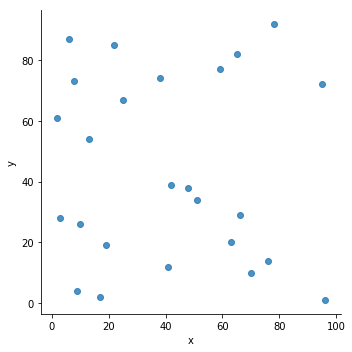

In [7]:
sns.lmplot('x', 'y', data=df, fit_reg=False)
